# Grid Searching MLP models in Keras

based on https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras.models import Sequential
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv("OSA_complete_patients.csv", index_col = 0)

In [3]:
features = ['Sex', 'Age', 'Current_smoker', 'Former_smoker',
       'Sedentary', 'Height', 'Weight', 'Cervical_perimeter',
       'Abdominal_perimeter', 'Systolic_BP', 'Diastolic_BP',
       'Maxillofacial_profile', 'BMI', 'High_BP', 'Asthma', 'Rhinitis', 'COPD',
       'Respiratory_fail', 'Myocardial_infarct', 'Coronary_fail',
       'Arrhythmias', 'Stroke', 'Heart_fail', 'Arteriopathy', 'Gastric_reflux',
       'Glaucoma', 'Diabetes', 'Hypercholesterolemia', 'Hypertriglyceridemia',
       'Hypo(er)thyroidism', 'Depression', 'Obesity', 'Dysmorphology',
       'Restless_Leg_Syndrome', 'Snoring', 'Diurnal_somnolence',
       'Driving_drowsiness', 'Morning_fatigue', 'Morning_headache',
       'Memory_problem', 'Nocturnal_perspiration',
       'Shortness_of_breath_on_exertion', 'Nocturia', 'Drowsiness_accident',
       'Near_miss_accident', 'Respiratory_arrest', 'Epworth_scale',
       'Pichots_scale', 'Depression_scale']


In [4]:
X=data[features]  # Features  
y=data['Severity']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)

### MinMax scaling X data

In [5]:
scaler = MinMaxScaler()  
    # Scale only on training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
    # apply same transformation to test data
X_test = scaler.transform(X_test) 

In [6]:
X_train.shape

(17454, 49)

## Creating epoch and batch size parameter grid and sequential model 

In [20]:
# Function to create model, required for KerasClassifier
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(12, input_shape=(49,), activation='relu'))
	model.add(Dense(4, activation='softmax'))
	# Compile model
	model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)
# split into input (X) and output (Y) variables
X = X_train
Y = y_train
# create model
model = KerasClassifier(model=create_model, verbose=1)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/10
1164/1164 [==============================] - 8s 6ms/step - loss: 1.2908 - accuracy: 0.4001
Epoch 2/10
1164/1164 [==============================] - 9s 7ms/step - loss: 1.2294 - accuracy: 0.4392
Epoch 3/10
1164/1164 [==============================] - 9s 8ms/step - loss: 1.2116 - accuracy: 0.4524
Epoch 4/10
1164/1164 [==============================] - 9s 8ms/step - loss: 1.2005 - accuracy: 0.4558
Epoch 5/10
1164/1164 [==============================] - 12s 10ms/step - loss: 1.1923 - accuracy: 0.4621
Epoch 6/10
1164/1164 [==============================] - 10s 9ms/step - loss: 1.1866 - accuracy: 0.4655
Epoch 7/10
1164/1164 [==============================] - 11s 9ms/step - loss: 1.1821 - accuracy: 0.4656
Epoch 8/10
1164/1164 [==============================] - 8s 7ms/step - loss: 1.1772 - accuracy: 0.4688
Epoch 9/10
1164/1164 [==============================] - 9s 7ms/step - loss: 1.1751 - accuracy: 0.4703
Epoch 10/10
582/582 [==============================] - 4s 5ms/step
Epoch 1/10


1164/1164 [==============================] - 8s 7ms/step - loss: 1.1440 - accuracy: 0.4857
Epoch 28/50
1164/1164 [==============================] - 7s 6ms/step - loss: 1.1434 - accuracy: 0.4865
Epoch 29/50
1164/1164 [==============================] - 8s 7ms/step - loss: 1.1431 - accuracy: 0.4875
Epoch 30/50
1164/1164 [==============================] - 7s 6ms/step - loss: 1.1416 - accuracy: 0.4882
Epoch 31/50
1164/1164 [==============================] - 8s 7ms/step - loss: 1.1421 - accuracy: 0.4870
Epoch 32/50
1164/1164 [==============================] - 8s 7ms/step - loss: 1.1421 - accuracy: 0.4867
Epoch 33/50
1164/1164 [==============================] - 8s 7ms/step - loss: 1.1416 - accuracy: 0.4876
Epoch 34/50
1164/1164 [==============================] - 8s 7ms/step - loss: 1.1402 - accuracy: 0.4882
Epoch 35/50
1164/1164 [==============================] - 8s 7ms/step - loss: 1.1406 - accuracy: 0.4860
Epoch 36/50
1164/1164 [==============================] - 8s 7ms/step - loss: 1.1401 -

1164/1164 [==============================] - 11s 10ms/step - loss: 1.1458 - accuracy: 0.4918
Epoch 34/100
1164/1164 [==============================] - 10s 9ms/step - loss: 1.1449 - accuracy: 0.4884
Epoch 35/100
1164/1164 [==============================] - 12s 10ms/step - loss: 1.1449 - accuracy: 0.4924
Epoch 36/100
1164/1164 [==============================] - 9s 7ms/step - loss: 1.1441 - accuracy: 0.4925
Epoch 37/100
1164/1164 [==============================] - 8s 7ms/step - loss: 1.1440 - accuracy: 0.4922
Epoch 38/100
1164/1164 [==============================] - 9s 8ms/step - loss: 1.1431 - accuracy: 0.4931
Epoch 39/100
1164/1164 [==============================] - 10s 8ms/step - loss: 1.1433 - accuracy: 0.4934
Epoch 40/100
1164/1164 [==============================] - 9s 8ms/step - loss: 1.1424 - accuracy: 0.4924
Epoch 41/100
1164/1164 [==============================] - 10s 8ms/step - loss: 1.1416 - accuracy: 0.4915
Epoch 42/100
1164/1164 [==============================] - 8s 7ms/step 

1164/1164 [==============================] - 2s 2ms/step - loss: 1.1245 - accuracy: 0.4948
Epoch 90/100
1164/1164 [==============================] - 2s 2ms/step - loss: 1.1242 - accuracy: 0.4991
Epoch 91/100
1164/1164 [==============================] - 3s 2ms/step - loss: 1.1239 - accuracy: 0.4976
Epoch 92/100
1164/1164 [==============================] - 4s 3ms/step - loss: 1.1239 - accuracy: 0.5003
Epoch 93/100
1164/1164 [==============================] - 4s 4ms/step - loss: 1.1237 - accuracy: 0.4966
Epoch 94/100
1164/1164 [==============================] - 4s 3ms/step - loss: 1.1237 - accuracy: 0.4963
Epoch 95/100
1164/1164 [==============================] - 3s 2ms/step - loss: 1.1237 - accuracy: 0.5020
Epoch 96/100
1164/1164 [==============================] - 4s 3ms/step - loss: 1.1235 - accuracy: 0.4985
Epoch 97/100
1164/1164 [==============================] - 3s 3ms/step - loss: 1.1244 - accuracy: 0.4980
Epoch 98/100
1164/1164 [==============================] - 2s 2ms/step - loss:

582/582 [==============================] - 1s 1ms/step - loss: 1.1551 - accuracy: 0.4811
Epoch 39/50
582/582 [==============================] - 1s 2ms/step - loss: 1.1556 - accuracy: 0.4826
Epoch 40/50
582/582 [==============================] - 1s 2ms/step - loss: 1.1548 - accuracy: 0.4819
Epoch 41/50
582/582 [==============================] - 1s 2ms/step - loss: 1.1552 - accuracy: 0.4788
Epoch 42/50
582/582 [==============================] - 1s 2ms/step - loss: 1.1541 - accuracy: 0.4814
Epoch 43/50
582/582 [==============================] - 1s 2ms/step - loss: 1.1540 - accuracy: 0.4820
Epoch 44/50
582/582 [==============================] - 1s 2ms/step - loss: 1.1539 - accuracy: 0.4814
Epoch 45/50
582/582 [==============================] - 1s 2ms/step - loss: 1.1532 - accuracy: 0.4820
Epoch 46/50
582/582 [==============================] - 1s 2ms/step - loss: 1.1530 - accuracy: 0.4836
Epoch 47/50
582/582 [==============================] - 1s 2ms/step - loss: 1.1531 - accuracy: 0.4811
Ep

582/582 [==============================] - 1s 2ms/step - loss: 1.1455 - accuracy: 0.4911
Epoch 49/100
582/582 [==============================] - 1s 2ms/step - loss: 1.1451 - accuracy: 0.4895
Epoch 50/100
582/582 [==============================] - 1s 1ms/step - loss: 1.1445 - accuracy: 0.4887
Epoch 51/100
582/582 [==============================] - 1s 1ms/step - loss: 1.1448 - accuracy: 0.4911
Epoch 52/100
582/582 [==============================] - 1s 2ms/step - loss: 1.1445 - accuracy: 0.4894
Epoch 53/100
582/582 [==============================] - 1s 2ms/step - loss: 1.1438 - accuracy: 0.4899
Epoch 54/100
582/582 [==============================] - 1s 2ms/step - loss: 1.1435 - accuracy: 0.4891
Epoch 55/100
582/582 [==============================] - 1s 3ms/step - loss: 1.1436 - accuracy: 0.4928
Epoch 56/100
582/582 [==============================] - 1s 2ms/step - loss: 1.1432 - accuracy: 0.4907
Epoch 57/100
582/582 [==============================] - 1s 2ms/step - loss: 1.1431 - accuracy: 

Epoch 28/100
582/582 [==============================] - 1s 2ms/step - loss: 1.1503 - accuracy: 0.4839
Epoch 29/100
582/582 [==============================] - 1s 2ms/step - loss: 1.1494 - accuracy: 0.4846
Epoch 30/100
582/582 [==============================] - 1s 1ms/step - loss: 1.1491 - accuracy: 0.4840
Epoch 31/100
582/582 [==============================] - 1s 2ms/step - loss: 1.1486 - accuracy: 0.4835
Epoch 32/100
582/582 [==============================] - 1s 2ms/step - loss: 1.1490 - accuracy: 0.4838
Epoch 33/100
582/582 [==============================] - 1s 2ms/step - loss: 1.1469 - accuracy: 0.4843
Epoch 34/100
582/582 [==============================] - 1s 2ms/step - loss: 1.1470 - accuracy: 0.4844
Epoch 35/100
582/582 [==============================] - 1s 2ms/step - loss: 1.1474 - accuracy: 0.4838
Epoch 36/100
582/582 [==============================] - 1s 2ms/step - loss: 1.1461 - accuracy: 0.4870
Epoch 37/100
582/582 [==============================] - 1s 2ms/step - loss: 1.1465

582/582 [==============================] - 1s 2ms/step - loss: 1.1282 - accuracy: 0.4947
Epoch 88/100
582/582 [==============================] - 1s 2ms/step - loss: 1.1275 - accuracy: 0.4965
Epoch 89/100
582/582 [==============================] - 1s 2ms/step - loss: 1.1281 - accuracy: 0.4969
Epoch 90/100
582/582 [==============================] - 1s 2ms/step - loss: 1.1276 - accuracy: 0.4949
Epoch 91/100
582/582 [==============================] - 1s 2ms/step - loss: 1.1279 - accuracy: 0.4951
Epoch 92/100
582/582 [==============================] - 1s 2ms/step - loss: 1.1269 - accuracy: 0.4966
Epoch 93/100
582/582 [==============================] - 1s 2ms/step - loss: 1.1272 - accuracy: 0.4964
Epoch 94/100
582/582 [==============================] - 1s 2ms/step - loss: 1.1273 - accuracy: 0.4919
Epoch 95/100
582/582 [==============================] - 1s 2ms/step - loss: 1.1270 - accuracy: 0.4936
Epoch 96/100
582/582 [==============================] - 1s 2ms/step - loss: 1.1273 - accuracy: 

291/291 [==============================] - 1s 2ms/step - loss: 1.1639 - accuracy: 0.4769
Epoch 17/50
291/291 [==============================] - 1s 2ms/step - loss: 1.1613 - accuracy: 0.4789
Epoch 18/50
291/291 [==============================] - 1s 2ms/step - loss: 1.1607 - accuracy: 0.4786
Epoch 19/50
291/291 [==============================] - 0s 2ms/step - loss: 1.1589 - accuracy: 0.4812
Epoch 20/50
291/291 [==============================] - 0s 2ms/step - loss: 1.1586 - accuracy: 0.4799
Epoch 21/50
291/291 [==============================] - 0s 2ms/step - loss: 1.1576 - accuracy: 0.4814
Epoch 22/50
291/291 [==============================] - 0s 2ms/step - loss: 1.1567 - accuracy: 0.4797
Epoch 23/50
291/291 [==============================] - 0s 2ms/step - loss: 1.1554 - accuracy: 0.4819
Epoch 24/50
291/291 [==============================] - 0s 2ms/step - loss: 1.1542 - accuracy: 0.4824
Epoch 25/50
291/291 [==============================] - 0s 2ms/step - loss: 1.1530 - accuracy: 0.4850
Ep

Epoch 26/100
291/291 [==============================] - 1s 2ms/step - loss: 1.1535 - accuracy: 0.4852
Epoch 27/100
291/291 [==============================] - 0s 2ms/step - loss: 1.1529 - accuracy: 0.4838
Epoch 28/100
291/291 [==============================] - 0s 2ms/step - loss: 1.1521 - accuracy: 0.4869
Epoch 29/100
291/291 [==============================] - 0s 1ms/step - loss: 1.1511 - accuracy: 0.4862
Epoch 30/100
291/291 [==============================] - 0s 2ms/step - loss: 1.1508 - accuracy: 0.4840
Epoch 31/100
291/291 [==============================] - 0s 2ms/step - loss: 1.1502 - accuracy: 0.4862
Epoch 32/100
291/291 [==============================] - 0s 2ms/step - loss: 1.1504 - accuracy: 0.4860
Epoch 33/100
291/291 [==============================] - 1s 2ms/step - loss: 1.1481 - accuracy: 0.4895
Epoch 34/100
291/291 [==============================] - 0s 2ms/step - loss: 1.1497 - accuracy: 0.4840
Epoch 35/100
291/291 [==============================] - 1s 2ms/step - loss: 1.1491

291/291 [==============================] - 0s 2ms/step - loss: 1.1365 - accuracy: 0.4910
Epoch 86/100
291/291 [==============================] - 0s 2ms/step - loss: 1.1357 - accuracy: 0.4896
Epoch 87/100
291/291 [==============================] - 0s 2ms/step - loss: 1.1366 - accuracy: 0.4908
Epoch 88/100
291/291 [==============================] - 0s 2ms/step - loss: 1.1359 - accuracy: 0.4910
Epoch 89/100
291/291 [==============================] - 0s 2ms/step - loss: 1.1359 - accuracy: 0.4927
Epoch 90/100
291/291 [==============================] - 0s 2ms/step - loss: 1.1358 - accuracy: 0.4927
Epoch 91/100
291/291 [==============================] - 1s 2ms/step - loss: 1.1355 - accuracy: 0.4943
Epoch 92/100
291/291 [==============================] - 1s 2ms/step - loss: 1.1352 - accuracy: 0.4924
Epoch 93/100
291/291 [==============================] - 0s 2ms/step - loss: 1.1354 - accuracy: 0.4899
Epoch 94/100
291/291 [==============================] - 0s 2ms/step - loss: 1.1354 - accuracy: 

194/194 [==============================] - 0s 2ms/step - loss: 1.1670 - accuracy: 0.4728
Epoch 15/50
194/194 [==============================] - 0s 2ms/step - loss: 1.1654 - accuracy: 0.4725
Epoch 16/50
194/194 [==============================] - 0s 2ms/step - loss: 1.1639 - accuracy: 0.4752
Epoch 17/50
194/194 [==============================] - 0s 2ms/step - loss: 1.1616 - accuracy: 0.4759
Epoch 18/50
194/194 [==============================] - 0s 2ms/step - loss: 1.1617 - accuracy: 0.4744
Epoch 19/50
194/194 [==============================] - 0s 2ms/step - loss: 1.1594 - accuracy: 0.4761
Epoch 20/50
194/194 [==============================] - 0s 2ms/step - loss: 1.1595 - accuracy: 0.4765
Epoch 21/50
194/194 [==============================] - 1s 4ms/step - loss: 1.1586 - accuracy: 0.4777
Epoch 22/50
194/194 [==============================] - 1s 3ms/step - loss: 1.1571 - accuracy: 0.4795
Epoch 23/50
194/194 [==============================] - 0s 2ms/step - loss: 1.1562 - accuracy: 0.4790
Ep

194/194 [==============================] - 0s 2ms/step - loss: 1.1583 - accuracy: 0.4768
Epoch 25/100
194/194 [==============================] - 0s 2ms/step - loss: 1.1581 - accuracy: 0.4786
Epoch 26/100
194/194 [==============================] - 0s 2ms/step - loss: 1.1567 - accuracy: 0.4810
Epoch 27/100
194/194 [==============================] - 0s 2ms/step - loss: 1.1565 - accuracy: 0.4777
Epoch 28/100
194/194 [==============================] - 0s 2ms/step - loss: 1.1561 - accuracy: 0.4799
Epoch 29/100
194/194 [==============================] - 0s 2ms/step - loss: 1.1552 - accuracy: 0.4783
Epoch 30/100
194/194 [==============================] - 0s 2ms/step - loss: 1.1546 - accuracy: 0.4808
Epoch 31/100
194/194 [==============================] - 0s 2ms/step - loss: 1.1541 - accuracy: 0.4804
Epoch 32/100
194/194 [==============================] - 0s 2ms/step - loss: 1.1541 - accuracy: 0.4834
Epoch 33/100
194/194 [==============================] - 0s 2ms/step - loss: 1.1526 - accuracy: 

194/194 [==============================] - 0s 2ms/step - loss: 1.1325 - accuracy: 0.4930
Epoch 84/100
194/194 [==============================] - 0s 2ms/step - loss: 1.1320 - accuracy: 0.4941
Epoch 85/100
194/194 [==============================] - 0s 2ms/step - loss: 1.1327 - accuracy: 0.4918
Epoch 86/100
194/194 [==============================] - 0s 2ms/step - loss: 1.1318 - accuracy: 0.4919
Epoch 87/100
194/194 [==============================] - 0s 2ms/step - loss: 1.1317 - accuracy: 0.4931
Epoch 88/100
194/194 [==============================] - 0s 2ms/step - loss: 1.1317 - accuracy: 0.4958
Epoch 89/100
194/194 [==============================] - 0s 2ms/step - loss: 1.1316 - accuracy: 0.4944
Epoch 90/100
194/194 [==============================] - 0s 2ms/step - loss: 1.1311 - accuracy: 0.4948
Epoch 91/100
194/194 [==============================] - 0s 2ms/step - loss: 1.1317 - accuracy: 0.4924
Epoch 92/100
194/194 [==============================] - 0s 2ms/step - loss: 1.1311 - accuracy: 

146/146 [==============================] - 0s 3ms/step - loss: 1.1818 - accuracy: 0.4661
Epoch 13/50
146/146 [==============================] - 0s 2ms/step - loss: 1.1779 - accuracy: 0.4686
Epoch 14/50
146/146 [==============================] - 0s 3ms/step - loss: 1.1750 - accuracy: 0.4719
Epoch 15/50
146/146 [==============================] - 0s 2ms/step - loss: 1.1722 - accuracy: 0.4736
Epoch 16/50
146/146 [==============================] - 0s 3ms/step - loss: 1.1697 - accuracy: 0.4751
Epoch 17/50
146/146 [==============================] - 0s 3ms/step - loss: 1.1668 - accuracy: 0.4753
Epoch 18/50
146/146 [==============================] - 0s 3ms/step - loss: 1.1657 - accuracy: 0.4765
Epoch 19/50
146/146 [==============================] - 0s 3ms/step - loss: 1.1633 - accuracy: 0.4778
Epoch 20/50
146/146 [==============================] - 0s 2ms/step - loss: 1.1620 - accuracy: 0.4775
Epoch 21/50
146/146 [==============================] - 0s 3ms/step - loss: 1.1602 - accuracy: 0.4786
Ep

146/146 [==============================] - 0s 2ms/step - loss: 1.1661 - accuracy: 0.4766
Epoch 23/100
146/146 [==============================] - 0s 2ms/step - loss: 1.1658 - accuracy: 0.4744
Epoch 24/100
146/146 [==============================] - 0s 3ms/step - loss: 1.1638 - accuracy: 0.4733
Epoch 25/100
146/146 [==============================] - 0s 2ms/step - loss: 1.1629 - accuracy: 0.4795
Epoch 26/100
146/146 [==============================] - 0s 2ms/step - loss: 1.1615 - accuracy: 0.4791
Epoch 27/100
146/146 [==============================] - 0s 2ms/step - loss: 1.1609 - accuracy: 0.4794
Epoch 28/100
146/146 [==============================] - 0s 2ms/step - loss: 1.1598 - accuracy: 0.4787
Epoch 29/100
146/146 [==============================] - 0s 2ms/step - loss: 1.1595 - accuracy: 0.4807
Epoch 30/100
146/146 [==============================] - 0s 2ms/step - loss: 1.1579 - accuracy: 0.4804
Epoch 31/100
146/146 [==============================] - 0s 2ms/step - loss: 1.1569 - accuracy: 

146/146 [==============================] - 0s 3ms/step - loss: 1.1386 - accuracy: 0.4922
Epoch 82/100
146/146 [==============================] - 0s 3ms/step - loss: 1.1377 - accuracy: 0.4914
Epoch 83/100
146/146 [==============================] - 0s 3ms/step - loss: 1.1382 - accuracy: 0.4936
Epoch 84/100
146/146 [==============================] - 0s 3ms/step - loss: 1.1374 - accuracy: 0.4916
Epoch 85/100
146/146 [==============================] - 0s 3ms/step - loss: 1.1386 - accuracy: 0.4934
Epoch 86/100
146/146 [==============================] - 0s 2ms/step - loss: 1.1375 - accuracy: 0.4916
Epoch 87/100
146/146 [==============================] - 0s 2ms/step - loss: 1.1375 - accuracy: 0.4924
Epoch 88/100
146/146 [==============================] - 0s 2ms/step - loss: 1.1375 - accuracy: 0.4911
Epoch 89/100
146/146 [==============================] - 0s 2ms/step - loss: 1.1372 - accuracy: 0.4930
Epoch 90/100
146/146 [==============================] - 0s 2ms/step - loss: 1.1373 - accuracy: 

117/117 [==============================] - 0s 2ms/step - loss: 1.1872 - accuracy: 0.4647
Epoch 11/50
117/117 [==============================] - 0s 2ms/step - loss: 1.1838 - accuracy: 0.4637
Epoch 12/50
117/117 [==============================] - 0s 2ms/step - loss: 1.1813 - accuracy: 0.4675
Epoch 13/50
117/117 [==============================] - 0s 2ms/step - loss: 1.1780 - accuracy: 0.4689
Epoch 14/50
117/117 [==============================] - 0s 2ms/step - loss: 1.1755 - accuracy: 0.4717
Epoch 15/50
117/117 [==============================] - 0s 2ms/step - loss: 1.1735 - accuracy: 0.4715
Epoch 16/50
117/117 [==============================] - 0s 2ms/step - loss: 1.1718 - accuracy: 0.4715
Epoch 17/50
117/117 [==============================] - 0s 2ms/step - loss: 1.1694 - accuracy: 0.4710
Epoch 18/50
117/117 [==============================] - 0s 2ms/step - loss: 1.1690 - accuracy: 0.4740
Epoch 19/50
117/117 [==============================] - 0s 2ms/step - loss: 1.1670 - accuracy: 0.4745
Ep

117/117 [==============================] - 0s 2ms/step - loss: 1.1677 - accuracy: 0.4717
Epoch 21/100
117/117 [==============================] - 0s 2ms/step - loss: 1.1666 - accuracy: 0.4710
Epoch 22/100
117/117 [==============================] - 0s 2ms/step - loss: 1.1659 - accuracy: 0.4727
Epoch 23/100
117/117 [==============================] - 0s 2ms/step - loss: 1.1650 - accuracy: 0.4734
Epoch 24/100
117/117 [==============================] - 0s 2ms/step - loss: 1.1636 - accuracy: 0.4765
Epoch 25/100
117/117 [==============================] - 0s 2ms/step - loss: 1.1624 - accuracy: 0.4777
Epoch 26/100
117/117 [==============================] - 0s 2ms/step - loss: 1.1613 - accuracy: 0.4763
Epoch 27/100
117/117 [==============================] - 0s 2ms/step - loss: 1.1605 - accuracy: 0.4766
Epoch 28/100
117/117 [==============================] - 0s 2ms/step - loss: 1.1601 - accuracy: 0.4761
Epoch 29/100
117/117 [==============================] - 0s 2ms/step - loss: 1.1598 - accuracy: 

117/117 [==============================] - 0s 2ms/step - loss: 1.1398 - accuracy: 0.4854
Epoch 81/100
117/117 [==============================] - 0s 2ms/step - loss: 1.1402 - accuracy: 0.4858
Epoch 82/100
117/117 [==============================] - 0s 2ms/step - loss: 1.1393 - accuracy: 0.4875
Epoch 83/100
117/117 [==============================] - 0s 3ms/step - loss: 1.1395 - accuracy: 0.4862
Epoch 84/100
117/117 [==============================] - 0s 4ms/step - loss: 1.1388 - accuracy: 0.4856
Epoch 85/100
117/117 [==============================] - 0s 3ms/step - loss: 1.1401 - accuracy: 0.4845
Epoch 86/100
117/117 [==============================] - 0s 3ms/step - loss: 1.1388 - accuracy: 0.4873
Epoch 87/100
117/117 [==============================] - 0s 4ms/step - loss: 1.1389 - accuracy: 0.4889
Epoch 88/100
117/117 [==============================] - 0s 3ms/step - loss: 1.1387 - accuracy: 0.4851
Epoch 89/100
117/117 [==============================] - 0s 2ms/step - loss: 1.1385 - accuracy: 

175/175 [==============================] - 1s 3ms/step - loss: 1.1521 - accuracy: 0.4844
Epoch 61/100
175/175 [==============================] - 0s 2ms/step - loss: 1.1515 - accuracy: 0.4816
Epoch 62/100
175/175 [==============================] - 0s 2ms/step - loss: 1.1507 - accuracy: 0.4877
Epoch 63/100
175/175 [==============================] - 0s 2ms/step - loss: 1.1510 - accuracy: 0.4849
Epoch 64/100
175/175 [==============================] - 1s 3ms/step - loss: 1.1515 - accuracy: 0.4856
Epoch 65/100
175/175 [==============================] - 1s 3ms/step - loss: 1.1505 - accuracy: 0.4857
Epoch 66/100
175/175 [==============================] - 0s 3ms/step - loss: 1.1505 - accuracy: 0.4852
Epoch 67/100
175/175 [==============================] - 1s 3ms/step - loss: 1.1505 - accuracy: 0.4852
Epoch 68/100
175/175 [==============================] - 1s 4ms/step - loss: 1.1510 - accuracy: 0.4862
Epoch 69/100
175/175 [==============================] - 1s 3ms/step - loss: 1.1501 - accuracy: 

### Creating a model (modelT) based on best parameters from previous step

In [21]:
# Best: 0.468088 using {'batch_size': 100, 'epochs': 100}

modelT = Sequential()
modelT.add(Dense(12, input_shape=(49,), activation='relu'))
modelT.add(Dense(4, activation='softmax'))
# Compile model
modelT.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelT.fit(X_train, y_train, epochs = 100, batch_size = 100)

Epoch 1/100
175/175 [==============================] - 1s 2ms/step - loss: 1.3219 - accuracy: 0.3789
Epoch 2/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2583 - accuracy: 0.4293
Epoch 3/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2332 - accuracy: 0.4435
Epoch 4/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2191 - accuracy: 0.4492
Epoch 5/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2100 - accuracy: 0.4512
Epoch 6/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2033 - accuracy: 0.4561
Epoch 7/100
175/175 [==============================] - 0s 2ms/step - loss: 1.1982 - accuracy: 0.4586
Epoch 8/100
175/175 [==============================] - 0s 2ms/step - loss: 1.1933 - accuracy: 0.4622
Epoch 9/100
175/175 [==============================] - 0s 2ms/step - loss: 1.1898 - accuracy: 0.4632
Epoch 10/100
175/175 [==============================] - 0s 2ms/step - loss: 1.1862 - accura

### Evaluating model using test sets

In [22]:
val_loss, val_acc = modelT.evaluate(X_test, y_test)

137/137 [==============================] - 0s 2ms/step - loss: 1.1864 - accuracy: 0.4569


### Classification report and confusion matrix

In [23]:
# to look at confusion matrix and f1 scores

y_pred = modelT.predict(X_test)
y_pred_sev = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_sev))

137/137 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.48      0.19      0.27       572
           1       0.32      0.45      0.37      1007
           2       0.33      0.08      0.13      1029
           3       0.55      0.77      0.64      1756

    accuracy                           0.46      4364
   macro avg       0.42      0.37      0.35      4364
weighted avg       0.43      0.46      0.41      4364



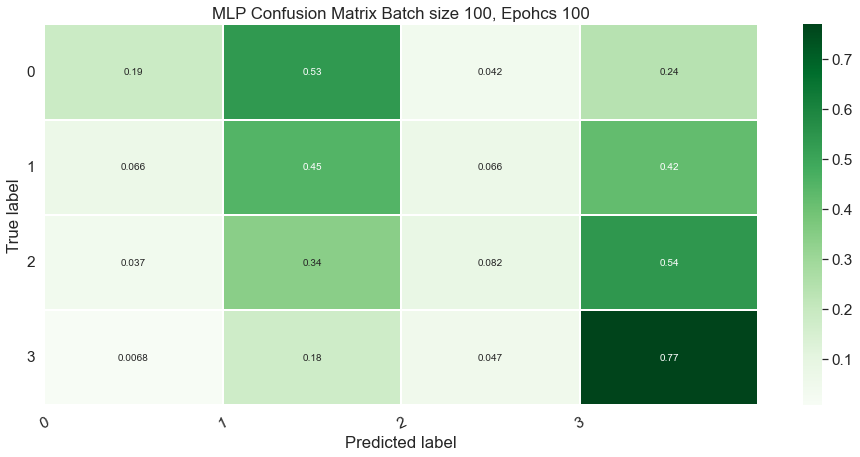

In [25]:
matrix = confusion_matrix(y_test, y_pred_sev)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '1','2', '3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('MLP Confusion Matrix Batch size 100, Epochs 100')
plt.show()

## Tune the Training Optimization Algorithm

In [26]:
# Function to create model, required for KerasClassifier
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(12, input_shape=(49,), activation='relu'))
	model.add(Dense(4, activation='softmax'))
	# Return model without compile because optimizer is defined within parameters
	return model
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)
# split into input (X) and output (Y) variables
X = X_train
Y = y_train
# create model
model = KerasClassifier(model=create_model,epochs = 100, batch_size = 100, loss = 'sparse_categorical_crossentropy', verbose=1)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/100
175/175 [==============================] - 1s 2ms/step - loss: 1.4490
Epoch 2/100
175/175 [==============================] - 0s 2ms/step - loss: 1.3092
Epoch 3/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2897
Epoch 4/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2759
Epoch 5/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2644
Epoch 6/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2552
Epoch 7/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2472
Epoch 8/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2403
Epoch 9/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2343
Epoch 10/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2290
Epoch 11/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2244
Epoch 12/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2206
Epoch 13/100


### Creating a model (modelT) based on best parameters from previous step
#Best: 0.467916 using {'optimizer': 'Adamax'}

In [27]:
modelT = Sequential()
modelT.add(Dense(12, input_shape=(49,), activation='relu'))
modelT.add(Dense(4, activation='softmax'))
# Compile model
modelT.compile(loss='sparse_categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])
modelT.fit(X_train, y_train, epochs = 100, batch_size = 100)

Epoch 1/100
175/175 [==============================] - 1s 2ms/step - loss: 1.3718 - accuracy: 0.3175
Epoch 2/100
175/175 [==============================] - 0s 2ms/step - loss: 1.3070 - accuracy: 0.3871
Epoch 3/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2845 - accuracy: 0.4031
Epoch 4/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2681 - accuracy: 0.4144
Epoch 5/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2556 - accuracy: 0.4272
Epoch 6/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2465 - accuracy: 0.4333
Epoch 7/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2385 - accuracy: 0.4397
Epoch 8/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2320 - accuracy: 0.4426
Epoch 9/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2261 - accuracy: 0.4464
Epoch 10/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2212 - accura

### Evaluating model using test sets

In [28]:
val_loss, val_acc = modelT.evaluate(X_test, y_test)

137/137 [==============================] - 0s 2ms/step - loss: 1.1799 - accuracy: 0.4551


### Classification report and confusion matrix

In [29]:
y_pred = modelT.predict(X_test)
y_pred_sev = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_sev))

137/137 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.48      0.16      0.24       572
           1       0.32      0.39      0.35      1007
           2       0.30      0.08      0.13      1029
           3       0.53      0.81      0.64      1756

    accuracy                           0.46      4364
   macro avg       0.41      0.36      0.34      4364
weighted avg       0.42      0.46      0.40      4364



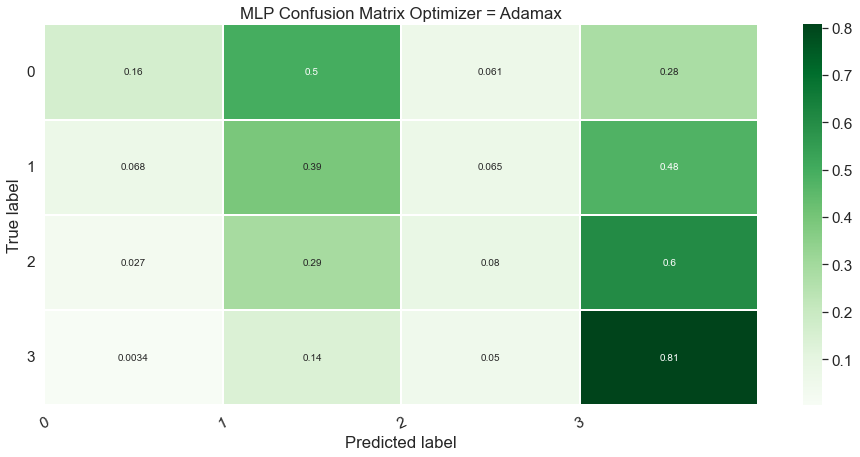

In [30]:
matrix = confusion_matrix(y_test, y_pred_sev)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '1','2', '3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('MLP Confusion Matrix Optimizer = Adamax')
plt.show()

## Tune Learning Rate and Momentum
Learning rate controls how much to update the weight at the end of each batch and the momentum controls how much to let the previous update influence the current weight update.

In [48]:
# Function to create model, required for KerasClassifier
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(12, input_shape=(49,), activation='relu'))
	model.add(Dense(4, activation='softmax'))
	# Return model 
	return model
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)
# split into input (X) and output (Y) variables
X = X_train
Y = y_train
# create model
model = KerasClassifier(model=create_model,epochs = 100, batch_size = 100,loss='sparse_categorical_crossentropy', optimizer='Adamax', verbose=1)
# define the grid search parameters
learn_rate = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
beta_1 = [ 0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
param_grid = dict(optimizer__learning_rate=learn_rate, optimizer__beta_1=beta_1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/100
175/175 [==============================] - 3s 7ms/step - loss: 1.4610
Epoch 2/100
175/175 [==============================] - 1s 7ms/step - loss: 1.3084
Epoch 3/100
175/175 [==============================] - 1s 6ms/step - loss: 1.2878
Epoch 4/100
175/175 [==============================] - 1s 7ms/step - loss: 1.2741
Epoch 5/100
175/175 [==============================] - 1s 7ms/step - loss: 1.2630
Epoch 6/100
175/175 [==============================] - 1s 8ms/step - loss: 1.2539
Epoch 7/100
175/175 [==============================] - 1s 8ms/step - loss: 1.2462
Epoch 8/100
175/175 [==============================] - 1s 8ms/step - loss: 1.2395
Epoch 9/100
175/175 [==============================] - 2s 9ms/step - loss: 1.2337
Epoch 10/100
175/175 [==============================] - 1s 8ms/step - loss: 1.2285
Epoch 11/100
175/175 [==============================] - 1s 7ms/step - loss: 1.2240
Epoch 12/100
175/175 [==============================] - 2s 9ms/step - loss: 1.2201
Epoch 13/100


### Creating a model (modelT) based on best parameters from previous step

Best: 0.469864 using {'optimizer__beta_1': 0.0, 'optimizer__learning_rate': 0.001}

In [49]:
modelT = Sequential()
modelT.add(Dense(12, input_shape=(49,), activation='relu'))
modelT.add(Dense(4, activation='softmax'))
# Compile model
opt = tf.keras.optimizers.Adamax(learning_rate = 0.001, beta_1 = 0.0)
modelT.compile(loss='sparse_categorical_crossentropy', optimizer= opt, metrics=['accuracy'])
modelT.fit(X_train, y_train, epochs = 100, batch_size = 100)

Epoch 1/100
175/175 [==============================] - 4s 8ms/step - loss: 1.3754 - accuracy: 0.3113
Epoch 2/100
175/175 [==============================] - 1s 8ms/step - loss: 1.3074 - accuracy: 0.3863
Epoch 3/100
175/175 [==============================] - 1s 7ms/step - loss: 1.2845 - accuracy: 0.4025
Epoch 4/100
175/175 [==============================] - 1s 7ms/step - loss: 1.2678 - accuracy: 0.4149
Epoch 5/100
175/175 [==============================] - 1s 7ms/step - loss: 1.2552 - accuracy: 0.4275
Epoch 6/100
175/175 [==============================] - 1s 7ms/step - loss: 1.2456 - accuracy: 0.4359
Epoch 7/100
175/175 [==============================] - 1s 6ms/step - loss: 1.2378 - accuracy: 0.4401
Epoch 8/100
175/175 [==============================] - 1s 6ms/step - loss: 1.2312 - accuracy: 0.4439
Epoch 9/100
175/175 [==============================] - 1s 6ms/step - loss: 1.2256 - accuracy: 0.4468
Epoch 10/100
175/175 [==============================] - 1s 6ms/step - loss: 1.2207 - accura

### Evaluating model using test sets

In [50]:
val_loss, val_acc = modelT.evaluate(X_test, y_test)

137/137 [==============================] - 2s 9ms/step - loss: 1.1800 - accuracy: 0.4574


### Classification report and confusion matrix

In [51]:
y_pred = modelT.predict(X_test)
y_pred_sev = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_sev))

137/137 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

           0       0.48      0.18      0.26       572
           1       0.32      0.39      0.35      1007
           2       0.31      0.08      0.13      1029
           3       0.53      0.81      0.64      1756

    accuracy                           0.46      4364
   macro avg       0.41      0.36      0.35      4364
weighted avg       0.42      0.46      0.40      4364



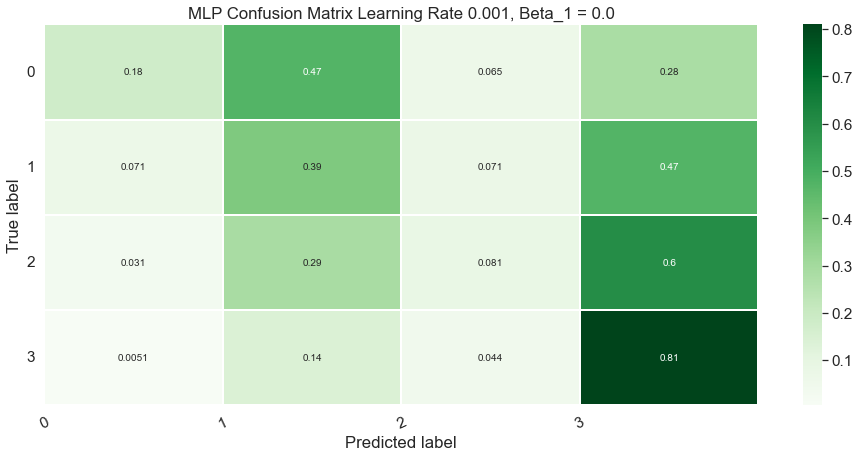

In [53]:
matrix = confusion_matrix(y_test, y_pred_sev)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '1','2', '3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('MLP Confusion Matrix Learning Rate 0.001, Beta_1 = 0.0')
plt.show()

## Tune Network Weight Initialization

In [9]:
# Function to create model, required for KerasClassifier
def create_model(init_mode='uniform'):
	# create model
	model = Sequential()
	model.add(Dense(12, input_shape=(49,), activation='relu', kernel_initializer=init_mode))  # note initializer
	model.add(Dense(4, activation='softmax'))
	# Compile model
	opt = tf.keras.optimizers.Adamax(learning_rate = 0.001, beta_1 = 0.0)
	model.compile(loss='sparse_categorical_crossentropy', optimizer= opt, metrics=['accuracy'])    
	# Return model 
	return model
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)
# split into input (X) and output (Y) variables
X = X_train
Y = y_train
# create model
model = KerasClassifier(model=create_model,epochs = 100, batch_size = 100, verbose=1)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(model__init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/100
175/175 [==============================] - 1s 2ms/step - loss: 1.3174 - accuracy: 0.3898
Epoch 2/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2740 - accuracy: 0.4025
Epoch 3/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2535 - accuracy: 0.4082
Epoch 4/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2394 - accuracy: 0.4206
Epoch 5/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2301 - accuracy: 0.4321
Epoch 6/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2231 - accuracy: 0.4430
Epoch 7/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2178 - accuracy: 0.4508
Epoch 8/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2130 - accuracy: 0.4543
Epoch 9/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2090 - accuracy: 0.4554
Epoch 10/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2053 - accura

### Creating a model (modelT) based on best parameters from previous step
Best: 0.468718 using {'model__init_mode': 'normal'}

In [10]:
modelT = Sequential()
modelT.add(Dense(12, input_shape=(49,), activation='relu', kernel_initializer='normal'))
modelT.add(Dense(4, activation='softmax', kernel_initializer='normal'))
# Compile model
opt = tf.keras.optimizers.Adamax(learning_rate = 0.001, beta_1 = 0.0)
modelT.compile(loss='sparse_categorical_crossentropy', optimizer= opt, metrics=['accuracy'])
modelT.fit(X_train, y_train, epochs = 100, batch_size = 100)

Epoch 1/100
175/175 [==============================] - 1s 2ms/step - loss: 1.3281 - accuracy: 0.3988
Epoch 2/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2781 - accuracy: 0.4023
Epoch 3/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2552 - accuracy: 0.4131
Epoch 4/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2377 - accuracy: 0.4362
Epoch 5/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2276 - accuracy: 0.4442
Epoch 6/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2215 - accuracy: 0.4493
Epoch 7/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2172 - accuracy: 0.4510
Epoch 8/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2136 - accuracy: 0.4514
Epoch 9/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2104 - accuracy: 0.4533
Epoch 10/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2074 - accura

### Evaluating model using test sets

In [11]:
val_loss, val_acc = modelT.evaluate(X_test, y_test)

137/137 [==============================] - 0s 2ms/step - loss: 1.1763 - accuracy: 0.4601


### Classification report and confusion matrix

In [12]:
y_pred = modelT.predict(X_test)
y_pred_sev = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_sev))

137/137 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.50      0.17      0.25       572
           1       0.33      0.41      0.37      1007
           2       0.30      0.07      0.11      1029
           3       0.53      0.81      0.64      1756

    accuracy                           0.46      4364
   macro avg       0.42      0.37      0.34      4364
weighted avg       0.43      0.46      0.40      4364



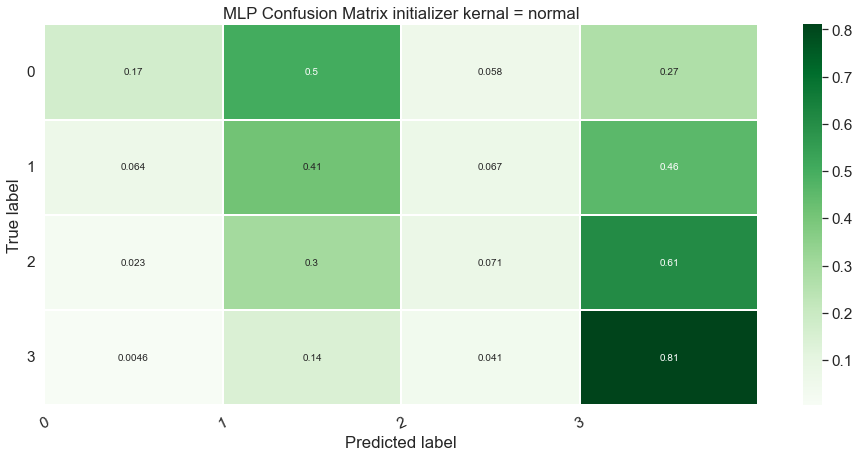

In [14]:
matrix = confusion_matrix(y_test, y_pred_sev)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '1','2', '3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('MLP Confusion Matrix initializer kernal = normal')
plt.show()

## Tune the Neuron Activation Function

In [15]:
# Function to create model, required for KerasClassifier
def create_model(activation='relu'):
	# create model
	model = Sequential()
	model.add(Dense(12, input_shape=(49,), kernel_initializer='normal', activation=activation))  
	model.add(Dense(4, activation='softmax', kernel_initializer='normal'))
	# Compile model
	opt = tf.keras.optimizers.Adamax(learning_rate = 0.001, beta_1 = 0.0)
	model.compile(loss='sparse_categorical_crossentropy', optimizer= opt, metrics=['accuracy'])    
	# Return model 
	return model
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)
# split into input (X) and output (Y) variables
X = X_train
Y = y_train
# create model
model = KerasClassifier(model=create_model,epochs = 100, batch_size = 100, verbose=1)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(model__activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/100
175/175 [==============================] - 1s 2ms/step - loss: 1.3255 - accuracy: 0.4021
Epoch 2/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2899 - accuracy: 0.4023
Epoch 3/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2600 - accuracy: 0.4155
Epoch 4/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2360 - accuracy: 0.4405
Epoch 5/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2245 - accuracy: 0.4484
Epoch 6/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2184 - accuracy: 0.4523
Epoch 7/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2142 - accuracy: 0.4536
Epoch 8/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2107 - accuracy: 0.4550
Epoch 9/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2075 - accuracy: 0.4559
Epoch 10/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2045 - accura

### Creating a model (modelT) based on best parameters from previous step
Best: 0.471181 using {'model__activation': 'softsign'}

In [16]:
modelT = Sequential()
modelT.add(Dense(12, input_shape=(49,), activation='softsign', kernel_initializer='normal'))
modelT.add(Dense(4, activation='softmax', kernel_initializer='normal'))
# Compile model
opt = tf.keras.optimizers.Adamax(learning_rate = 0.001, beta_1 = 0.0)
modelT.compile(loss='sparse_categorical_crossentropy', optimizer= opt, metrics=['accuracy'])
modelT.fit(X_train, y_train, epochs = 100, batch_size = 100)

Epoch 1/100
175/175 [==============================] - 1s 2ms/step - loss: 1.3275 - accuracy: 0.4008
Epoch 2/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2822 - accuracy: 0.4035
Epoch 3/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2521 - accuracy: 0.4288
Epoch 4/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2329 - accuracy: 0.4442
Epoch 5/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2235 - accuracy: 0.4493
Epoch 6/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2179 - accuracy: 0.4523
Epoch 7/100
175/175 [==============================] - 1s 3ms/step - loss: 1.2139 - accuracy: 0.4538
Epoch 8/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2102 - accuracy: 0.4543
Epoch 9/100
175/175 [==============================] - 1s 3ms/step - loss: 1.2068 - accuracy: 0.4559
Epoch 10/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2036 - accura

### Evaluating model using test sets

In [17]:
val_loss, val_acc = modelT.evaluate(X_test, y_test)

137/137 [==============================] - 0s 2ms/step - loss: 1.1757 - accuracy: 0.4617


### Classification report and confusion matrix

In [18]:
y_pred = modelT.predict(X_test)
y_pred_sev = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_sev))

137/137 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.48      0.19      0.27       572
           1       0.33      0.40      0.36      1007
           2       0.31      0.07      0.12      1029
           3       0.53      0.81      0.64      1756

    accuracy                           0.46      4364
   macro avg       0.41      0.37      0.35      4364
weighted avg       0.43      0.46      0.41      4364



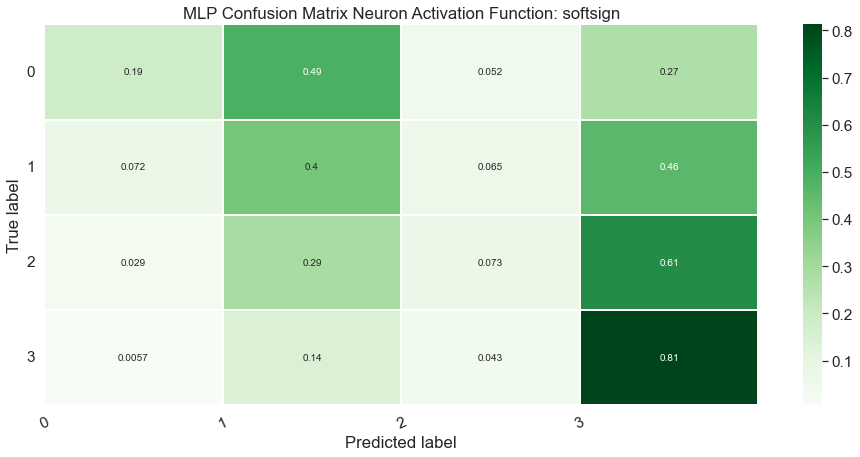

In [20]:
matrix = confusion_matrix(y_test, y_pred_sev)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '1','2', '3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('MLP Confusion Matrix Neuron Activation Function: softsign')
plt.show()

## Tune Dropout Regularization

In [22]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm

In [23]:
# Function to create model, required for KerasClassifier
def create_model(dropout_rate, weight_constraint):
	# create model
	model = Sequential()
	model.add(Dense(12, input_shape=(49,), kernel_initializer='normal', activation='softsign', kernel_constraint=MaxNorm(weight_constraint))) 
	model.add(Dropout(dropout_rate))
	model.add(Dense(4, activation='softmax', kernel_initializer='normal'))
	# Compile model
	opt = tf.keras.optimizers.Adamax(learning_rate = 0.001, beta_1 = 0.0)
	model.compile(loss='sparse_categorical_crossentropy', optimizer= opt, metrics=['accuracy'])    
	# Return model 
	return model
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)
# split into input (X) and output (Y) variables
X = X_train
Y = y_train
# create model
model = KerasClassifier(model=create_model,epochs = 100, batch_size = 100, verbose=1)
# define the grid search parameters
weight_constraint = [1.0, 2.0, 3.0, 4.0, 5.0]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(model__dropout_rate=dropout_rate, model__weight_constraint=weight_constraint)
#param_grid = dict(model__dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/100
175/175 [==============================] - 1s 3ms/step - loss: 1.3285 - accuracy: 0.4004
Epoch 2/100
175/175 [==============================] - 0s 3ms/step - loss: 1.2954 - accuracy: 0.4023
Epoch 3/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2696 - accuracy: 0.4081
Epoch 4/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2467 - accuracy: 0.4347
Epoch 5/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2346 - accuracy: 0.4441
Epoch 6/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2253 - accuracy: 0.4473
Epoch 7/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2233 - accuracy: 0.4516
Epoch 8/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2199 - accuracy: 0.4550
Epoch 9/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2181 - accuracy: 0.4553
Epoch 10/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2134 - accura

### Creating a model (modelT) based on best parameters from previous step
Best: 0.473530 using {'model__dropout_rate': 0.3, 'model__weight_constraint': 4.0}

In [24]:
modelT = Sequential()
modelT.add(Dense(12, input_shape=(49,), activation='softsign', kernel_initializer='normal', kernel_constraint=MaxNorm(4.0)))
modelT.add(Dropout(0.3))
modelT.add(Dense(4, activation='softmax', kernel_initializer='normal'))
# Compile model
opt = tf.keras.optimizers.Adamax(learning_rate = 0.001, beta_1 = 0.0)
modelT.compile(loss='sparse_categorical_crossentropy', optimizer= opt, metrics=['accuracy'])
modelT.fit(X_train, y_train, epochs = 100, batch_size = 100)

Epoch 1/100
175/175 [==============================] - 1s 2ms/step - loss: 1.3304 - accuracy: 0.3981
Epoch 2/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2896 - accuracy: 0.4028
Epoch 3/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2617 - accuracy: 0.4207
Epoch 4/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2426 - accuracy: 0.4400
Epoch 5/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2329 - accuracy: 0.4466
Epoch 6/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2246 - accuracy: 0.4503
Epoch 7/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2226 - accuracy: 0.4520
Epoch 8/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2193 - accuracy: 0.4564
Epoch 9/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2182 - accuracy: 0.4528
Epoch 10/100
175/175 [==============================] - 0s 2ms/step - loss: 1.2132 - accura

### Evaluating model using test sets

In [25]:
val_loss, val_acc = modelT.evaluate(X_test, y_test)

137/137 [==============================] - 0s 2ms/step - loss: 1.1768 - accuracy: 0.4610


### Classification report and confusion matrix

In [26]:
y_pred = modelT.predict(X_test)
y_pred_sev = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_sev))

137/137 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.52      0.16      0.25       572
           1       0.33      0.44      0.38      1007
           2       0.29      0.04      0.08      1029
           3       0.53      0.82      0.64      1756

    accuracy                           0.46      4364
   macro avg       0.42      0.37      0.34      4364
weighted avg       0.43      0.46      0.40      4364



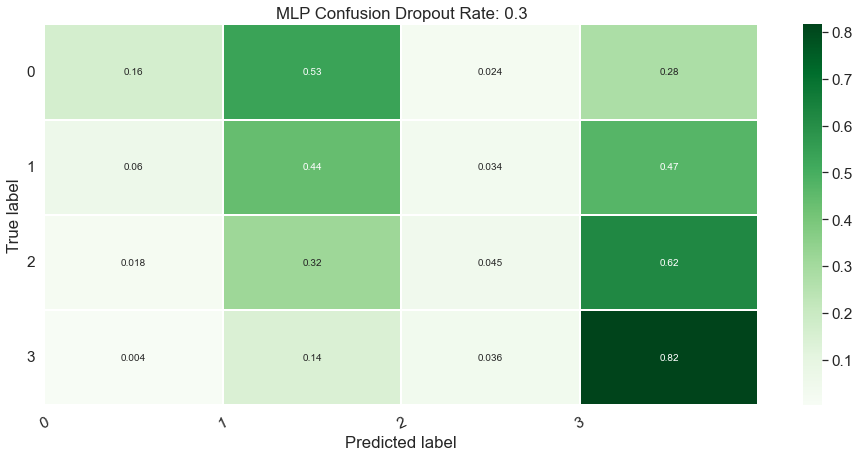

In [28]:
matrix = confusion_matrix(y_test, y_pred_sev)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '1','2', '3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('MLP Confusion Dropout Rate: 0.3')
plt.show()

## Tune the Number of Neurons in the Hidden Layer

In [29]:
# Function to create model, required for KerasClassifier
def create_model(neurons):
	# create model
	model = Sequential()
	model.add(Dense(neurons, input_shape=(49,), kernel_initializer='normal', activation='softsign', kernel_constraint=MaxNorm(4.0))) 
	model.add(Dropout(0.3))
	model.add(Dense(4, activation='softmax', kernel_initializer='normal'))
	# Compile model
	opt = tf.keras.optimizers.Adamax(learning_rate = 0.001, beta_1 = 0.0)
	model.compile(loss='sparse_categorical_crossentropy', optimizer= opt, metrics=['accuracy'])    
	# Return model 
	return model
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)
# split into input (X) and output (Y) variables
X = X_train
Y = y_train
# create model
model = KerasClassifier(model=create_model,epochs = 100, batch_size = 100, verbose=1)
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(model__neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/100
175/175 [==============================] - 6s 8ms/step - loss: 1.3293 - accuracy: 0.3925
Epoch 2/100
175/175 [==============================] - 1s 8ms/step - loss: 1.2859 - accuracy: 0.4025
Epoch 3/100
175/175 [==============================] - 1s 8ms/step - loss: 1.2577 - accuracy: 0.4196
Epoch 4/100
175/175 [==============================] - 2s 10ms/step - loss: 1.2396 - accuracy: 0.4403
Epoch 5/100
175/175 [==============================] - 2s 10ms/step - loss: 1.2307 - accuracy: 0.4456
Epoch 6/100
175/175 [==============================] - 1s 9ms/step - loss: 1.2248 - accuracy: 0.4489
Epoch 7/100
175/175 [==============================] - 2s 9ms/step - loss: 1.2218 - accuracy: 0.4500
Epoch 8/100
175/175 [==============================] - 2s 9ms/step - loss: 1.2175 - accuracy: 0.4515
Epoch 9/100
175/175 [==============================] - 2s 12ms/step - loss: 1.2153 - accuracy: 0.4561
Epoch 10/100
175/175 [==============================] - 2s 10ms/step - loss: 1.2120 - ac

### Creating a model (modelT) based on best parameters from previous step

Best: 0.470838 using {'model__neurons': 15}

In [30]:
modelT = Sequential()
modelT.add(Dense(15, input_shape=(49,), activation='softsign', kernel_initializer='normal', kernel_constraint=MaxNorm(4.0)))
modelT.add(Dropout(0.3))
modelT.add(Dense(4, activation='softmax', kernel_initializer='normal'))
# Compile model
opt = tf.keras.optimizers.Adamax(learning_rate = 0.001, beta_1 = 0.0)
modelT.compile(loss='sparse_categorical_crossentropy', optimizer= opt, metrics=['accuracy'])
modelT.fit(X_train, y_train, epochs = 100, batch_size = 100)

Epoch 1/100
175/175 [==============================] - 4s 8ms/step - loss: 1.3293 - accuracy: 0.3912
Epoch 2/100
175/175 [==============================] - 1s 7ms/step - loss: 1.2908 - accuracy: 0.4023
Epoch 3/100
175/175 [==============================] - 1s 8ms/step - loss: 1.2614 - accuracy: 0.4172
Epoch 4/100
175/175 [==============================] - 1s 8ms/step - loss: 1.2395 - accuracy: 0.4384
Epoch 5/100
175/175 [==============================] - 1s 8ms/step - loss: 1.2299 - accuracy: 0.4454
Epoch 6/100
175/175 [==============================] - 1s 7ms/step - loss: 1.2233 - accuracy: 0.4485
Epoch 7/100
175/175 [==============================] - 1s 6ms/step - loss: 1.2198 - accuracy: 0.4499
Epoch 8/100
175/175 [==============================] - 1s 6ms/step - loss: 1.2168 - accuracy: 0.4551
Epoch 9/100
175/175 [==============================] - 1s 6ms/step - loss: 1.2138 - accuracy: 0.4545
Epoch 10/100
175/175 [==============================] - 1s 7ms/step - loss: 1.2104 - accura

### Evaluating model using test sets

In [31]:
val_loss, val_acc = modelT.evaluate(X_test, y_test)

137/137 [==============================] - 1s 5ms/step - loss: 1.1764 - accuracy: 0.4604


### Classification report and confusion matrix

In [32]:
y_pred = modelT.predict(X_test)
y_pred_sev = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_sev))

137/137 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.52      0.17      0.26       572
           1       0.33      0.42      0.37      1007
           2       0.31      0.06      0.10      1029
           3       0.53      0.81      0.64      1756

    accuracy                           0.46      4364
   macro avg       0.42      0.37      0.34      4364
weighted avg       0.43      0.46      0.40      4364



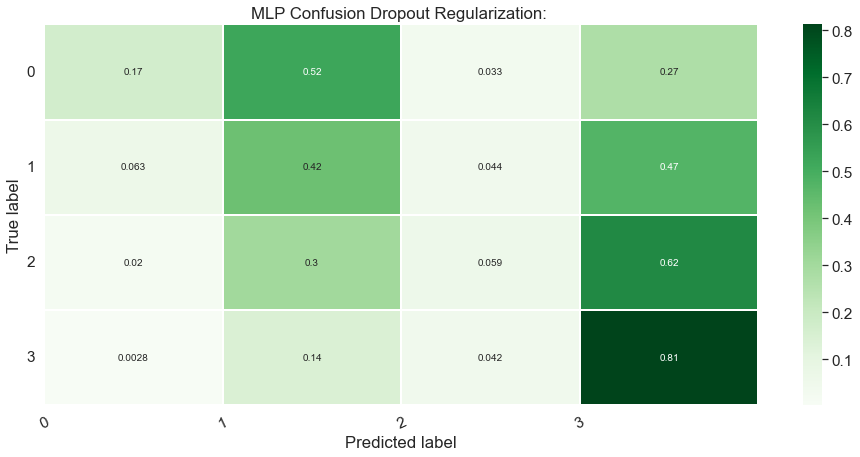

In [33]:
matrix = confusion_matrix(y_test, y_pred_sev)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '1','2', '3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('MLP Confusion Dropout Regularization: ')
plt.show()

## Adding more dense layers

### 2 dense

In [7]:
modelT = Sequential()
modelT.add(Dense(15, input_shape=(49,), activation='softsign', kernel_initializer='normal'))
modelT.add(Dense(15, input_shape=(49,), activation='relu', kernel_initializer='normal'))
modelT.add(Dense(4, activation='softmax', kernel_initializer='normal'))
# Compile model
opt = tf.keras.optimizers.Adamax(learning_rate = 0.001, beta_1 = 0.0)
modelT.compile(loss='sparse_categorical_crossentropy', optimizer= opt, metrics=['accuracy'])
modelT.fit(X_train, y_train, epochs = 50, batch_size = 100)

Epoch 1/50
175/175 [==============================] - 2s 2ms/step - loss: 1.3310 - accuracy: 0.4012
Epoch 2/50
175/175 [==============================] - 0s 2ms/step - loss: 1.2839 - accuracy: 0.4023
Epoch 3/50
175/175 [==============================] - 0s 2ms/step - loss: 1.2464 - accuracy: 0.4204
Epoch 4/50
175/175 [==============================] - 0s 2ms/step - loss: 1.2301 - accuracy: 0.4454
Epoch 5/50
175/175 [==============================] - 0s 2ms/step - loss: 1.2201 - accuracy: 0.4518
Epoch 6/50
175/175 [==============================] - 0s 2ms/step - loss: 1.2132 - accuracy: 0.4531
Epoch 7/50
175/175 [==============================] - 0s 2ms/step - loss: 1.2087 - accuracy: 0.4554
Epoch 8/50
175/175 [==============================] - 0s 2ms/step - loss: 1.2044 - accuracy: 0.4563
Epoch 9/50
175/175 [==============================] - 0s 2ms/step - loss: 1.2001 - accuracy: 0.4581
Epoch 10/50
175/175 [==============================] - 0s 2ms/step - loss: 1.1966 - accuracy: 0.4579

In [8]:
val_loss, val_acc = modelT.evaluate(X_test, y_test)

137/137 [==============================] - 1s 2ms/step - loss: 1.1786 - accuracy: 0.4624


In [9]:
y_pred = modelT.predict(X_test)
y_pred_sev = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_sev))

137/137 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.54      0.14      0.22       572
           1       0.34      0.36      0.35      1007
           2       0.33      0.03      0.05      1029
           3       0.51      0.88      0.64      1756

    accuracy                           0.46      4364
   macro avg       0.43      0.35      0.32      4364
weighted avg       0.43      0.46      0.38      4364



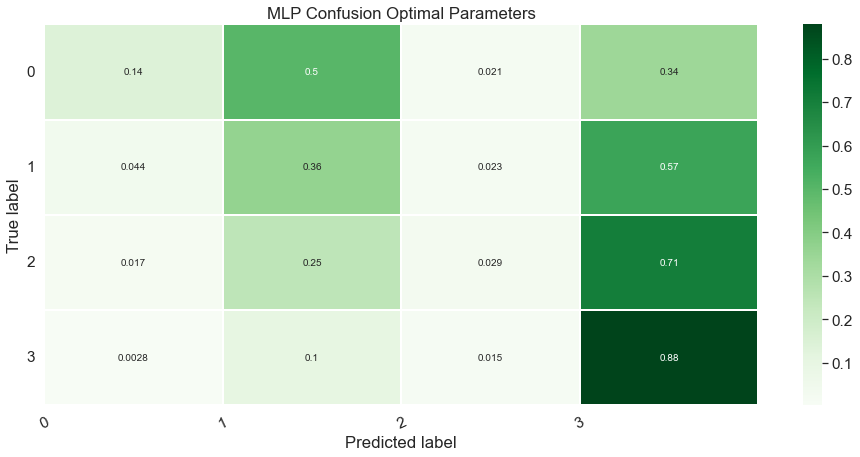

In [10]:
matrix = confusion_matrix(y_test, y_pred_sev)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '1','2', '3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('MLP Confusion Optimal Parameters')
plt.show()

### 3 Dense

In [40]:
modelT = Sequential()
modelT.add(Dense(15, input_shape=(49,), activation='relu', kernel_initializer='normal'))
modelT.add(Dense(15, input_shape=(49,), activation='relu'))
modelT.add(Dense(15, input_shape=(49,), activation='relu'))
modelT.add(Dense(4, activation='softmax'))
# Compile model
opt = tf.keras.optimizers.Adamax(learning_rate = 0.001, beta_1 = 0.0)
modelT.compile(loss='sparse_categorical_crossentropy', optimizer= opt, metrics=['accuracy'])
modelT.fit(X_train, y_train, epochs = 50, batch_size = 100)

Epoch 1/50
175/175 [==============================] - 2s 2ms/step - loss: 1.3079 - accuracy: 0.4019
Epoch 2/50
175/175 [==============================] - 1s 3ms/step - loss: 1.2562 - accuracy: 0.4161
Epoch 3/50
175/175 [==============================] - 1s 8ms/step - loss: 1.2332 - accuracy: 0.4435
Epoch 4/50
175/175 [==============================] - 1s 7ms/step - loss: 1.2199 - accuracy: 0.4501
Epoch 5/50
175/175 [==============================] - 1s 7ms/step - loss: 1.2106 - accuracy: 0.4538
Epoch 6/50
175/175 [==============================] - 1s 7ms/step - loss: 1.2022 - accuracy: 0.4561
Epoch 7/50
175/175 [==============================] - 1s 7ms/step - loss: 1.1941 - accuracy: 0.4578
Epoch 8/50
175/175 [==============================] - 1s 7ms/step - loss: 1.1875 - accuracy: 0.4605
Epoch 9/50
175/175 [==============================] - 1s 7ms/step - loss: 1.1827 - accuracy: 0.4628
Epoch 10/50
175/175 [==============================] - 2s 9ms/step - loss: 1.1787 - accuracy: 0.4652

In [41]:
val_loss, val_acc = modelT.evaluate(X_test, y_test)

137/137 [==============================] - 1s 3ms/step - loss: 1.1767 - accuracy: 0.4606
